In [1]:
## Import Libraries
import pandas as pd

In [2]:
heart_disease = pd.read_csv('heart-disease.csv')
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
## get Features
X = heart_disease.drop('target',axis=1)

## get Labels
Y = heart_disease['target']

In [4]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [5]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [6]:
## Choosing Model
from sklearn.ensemble import RandomForestClassifier

## an instance of our classifier
rf_clf = RandomForestClassifier()

rf_clf.get_params() ## hyper parameters

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [7]:
## Fit the model

## splitting Data
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [8]:
rf_clf.fit(x_train,y_train)

RandomForestClassifier()

In [9]:
y_pred = rf_clf.predict(x_test)

In [10]:
y_pred

array([0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1], dtype=int64)

In [11]:
rf_clf.score(x_train,y_train)

1.0

In [12]:
rf_clf.score(x_test,y_test)

0.8032786885245902

In [13]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

print(classification_report(y_test,y_pred))
print(50*'-')
print(confusion_matrix(y_test,y_pred))
print(50*'-')
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.74      0.79        31
           1       0.76      0.87      0.81        30

    accuracy                           0.80        61
   macro avg       0.81      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61

--------------------------------------------------
[[23  8]
 [ 4 26]]
--------------------------------------------------
0.8032786885245902


In [14]:
## Let's tune n-estimators -> n-estimators is a hyper parameter which shows the number of trees in the forest.
for i in range(10,105,5):
    print(f"With {i} as n_estimator : ")
    rf_clf = RandomForestClassifier(n_estimators=i)
    rf_clf.fit(x_train,y_train)
    print(f"The Score of Classifier is : {rf_clf.score(x_test,y_test) * 100:.2f}%")

## as we can observe in the following output the n-estimator with value = 20 is the best.

With 10 as n_estimator : 
The Score of Classifier is : 81.97%
With 15 as n_estimator : 
The Score of Classifier is : 80.33%
With 20 as n_estimator : 
The Score of Classifier is : 80.33%
With 25 as n_estimator : 
The Score of Classifier is : 75.41%
With 30 as n_estimator : 
The Score of Classifier is : 85.25%
With 35 as n_estimator : 
The Score of Classifier is : 83.61%
With 40 as n_estimator : 
The Score of Classifier is : 81.97%
With 45 as n_estimator : 
The Score of Classifier is : 78.69%
With 50 as n_estimator : 
The Score of Classifier is : 81.97%
With 55 as n_estimator : 
The Score of Classifier is : 81.97%
With 60 as n_estimator : 
The Score of Classifier is : 81.97%
With 65 as n_estimator : 
The Score of Classifier is : 81.97%
With 70 as n_estimator : 
The Score of Classifier is : 77.05%
With 75 as n_estimator : 
The Score of Classifier is : 78.69%
With 80 as n_estimator : 
The Score of Classifier is : 78.69%
With 85 as n_estimator : 
The Score of Classifier is : 80.33%
With 90 

In [15]:
## let's do the prediction for 75 n-estimator

rf_clf = RandomForestClassifier(n_estimators = 20)
rf_clf.fit(x_train,y_train)
y_pred = rf_clf.predict(x_test)


print(classification_report(y_test,y_pred))
print(50*'-')
print(confusion_matrix(y_test,y_pred))
print(50*'-')
print(accuracy_score(y_test,y_pred))
print(50*'-')
print(rf_clf.score(x_test,y_test))

              precision    recall  f1-score   support

           0       0.92      0.77      0.84        31
           1       0.80      0.93      0.86        30

    accuracy                           0.85        61
   macro avg       0.86      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61

--------------------------------------------------
[[24  7]
 [ 2 28]]
--------------------------------------------------
0.8524590163934426
--------------------------------------------------
0.8524590163934426


In [16]:
import pickle

pickle.dump(rf_clf,open("Random_Forest_1.pkl","wb"))

In [18]:
loaded_model = pickle.load(open("Random_Forest_1.pkl",'rb'))
loaded_model.score(x_test,y_test)

0.8524590163934426

In [19]:
import sklearn
sklearn.show_versions()

C:\Users\ASUS\AppData\Roaming\Python\Python39\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")



System:
    python: 3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)]
executable: d:\ProgrammingLanguages\anaconda\python.exe
   machine: Windows-10-10.0.19045-SP0

Python dependencies:
          pip: 22.2.2
   setuptools: 67.4.0
      sklearn: 1.0.2
        numpy: 1.24.4
        scipy: 1.9.1
       Cython: 0.29.32
       pandas: 1.4.4
   matplotlib: 3.5.2
       joblib: 1.1.0
threadpoolctl: 2.2.0

Built with OpenMP: True


In [23]:
clf = loaded_model

In [24]:
clf.predict(x_test)[:5]

array([0, 1, 0, 1, 0], dtype=int64)

* `predict proba` : predicting probabilities of each class for input

In [39]:
y_probs = clf.predict_proba(x_test)
y_probs

array([[0.7 , 0.3 ],
       [0.25, 0.75],
       [0.95, 0.05],
       [0.05, 0.95],
       [0.6 , 0.4 ],
       [0.9 , 0.1 ],
       [0.2 , 0.8 ],
       [0.05, 0.95],
       [0.45, 0.55],
       [0.8 , 0.2 ],
       [0.85, 0.15],
       [0.4 , 0.6 ],
       [0.8 , 0.2 ],
       [0.8 , 0.2 ],
       [0.2 , 0.8 ],
       [0.45, 0.55],
       [0.85, 0.15],
       [0.5 , 0.5 ],
       [0.35, 0.65],
       [0.25, 0.75],
       [0.4 , 0.6 ],
       [0.75, 0.25],
       [0.2 , 0.8 ],
       [0.1 , 0.9 ],
       [0.1 , 0.9 ],
       [0.85, 0.15],
       [0.55, 0.45],
       [0.05, 0.95],
       [0.2 , 0.8 ],
       [0.2 , 0.8 ],
       [0.3 , 0.7 ],
       [0.  , 1.  ],
       [0.95, 0.05],
       [0.25, 0.75],
       [0.35, 0.65],
       [0.15, 0.85],
       [0.2 , 0.8 ],
       [0.85, 0.15],
       [0.15, 0.85],
       [0.4 , 0.6 ],
       [0.95, 0.05],
       [1.  , 0.  ],
       [0.8 , 0.2 ],
       [0.9 , 0.1 ],
       [0.05, 0.95],
       [0.2 , 0.8 ],
       [0.1 , 0.9 ],
       [0.3 ,

## Evaluation
* Accuracy : Done
* ROC curve
* Confusion matrix

### AUC or ROC curve : <br>
*  ROC curve : model's comparison between TP and FP

### Quick Recap
#### TP,FP,TN,FN
* True positive or TP : model predicts 1 and the truth is 1
* False positive or FP : model predicts 1 and the truth is 0
* True Negative or TN : model predicts 0 and the truth is 0
* False Negative or FN : model predicts 0 and the truth is 1

In [40]:
from sklearn.metrics import roc_curve


y_probs_positive = y_probs[:,1] ## positivie lables
fp,tp,thresholds = roc_curve(y_test,y_probs_positive)

In [41]:
fp

array([0.        , 0.        , 0.03225806, 0.06451613, 0.12903226,
       0.19354839, 0.19354839, 0.19354839, 0.19354839, 0.22580645,
       0.29032258, 0.32258065, 0.38709677, 0.38709677, 0.4516129 ,
       0.64516129, 0.80645161, 0.87096774, 0.96774194, 1.        ])

In [42]:
tp

array([0.        , 0.06666667, 0.26666667, 0.33333333, 0.33333333,
       0.53333333, 0.73333333, 0.8       , 0.9       , 0.93333333,
       0.93333333, 0.96666667, 0.96666667, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

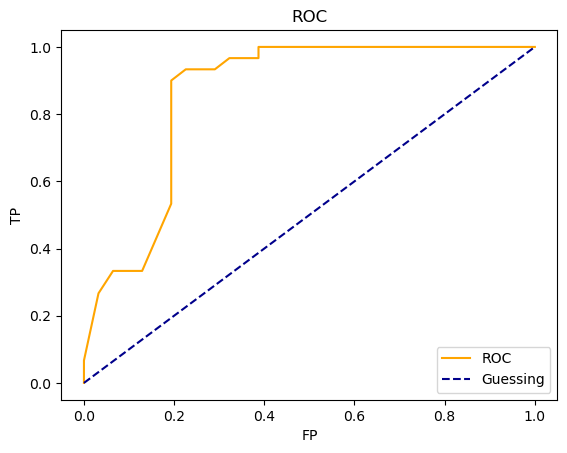

In [43]:
import matplotlib.pyplot as plt

def plot_roc(fp,tp):
    plt.plot(fp,tp,color='orange',label='ROC')
    plt.plot([0,1],[0,1],color='darkblue',linestyle = '--',label='Guessing')

    plt.xlabel('FP')
    plt.ylabel('TP')
    plt.title('ROC')
    plt.legend()
    plt.show()

plot_roc(fp,tp)

#### Auc score
* it calculates area under curve as we expected from its name.

In [44]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_probs_positive)

0.8602150537634409

### Confusion Matrix 

* confusion matrix is a matrix for comaparing what our model has returned and what truth labels are.

In [45]:
y_preds = clf.predict(x_test)

In [49]:
from sklearn.metrics import confusion_matrix
confusion_matrix(
    y_test,
    y_preds
)

array([[24,  7],
       [ 2, 28]], dtype=int64)

In [50]:
pd.crosstab(
    y_test,
    y_preds,
    rownames = ['Actual labels'],
    colnames = ['Predict labels']
)

Predict labels,0,1
Actual labels,,
0,24,7
1,2,28


In [52]:
(24 + 28) / (24 + 28 + 7 + 2)

0.8524590163934426

In [53]:
clf.score(x_test,y_test)

0.8524590163934426

**using seaborn to visualize**

<AxesSubplot:>

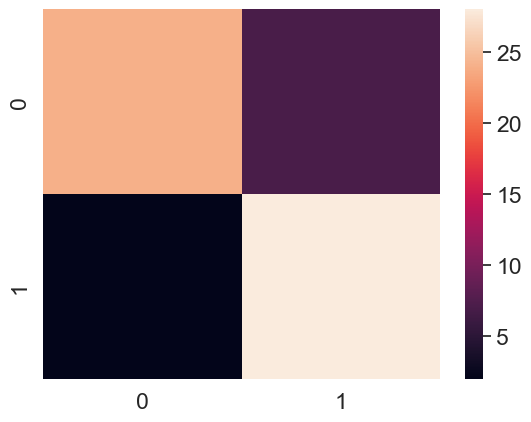

In [55]:
import seaborn as sns

sns.set(font_scale=1.5)

conf_mat = confusion_matrix(y_test,y_preds)
sns.heatmap(conf_mat)